
## 1. INTRODUCTION

The idea for this problem was first conceived while looking for European cities to migrate to.
Vienna (Austria), Copenhagen (Denmark), Zurich (Switzerland) and Frankfurt (Germany) are the most livable cities in Europe according to The Global Liveability Index of 2018. They are located in different countries, they are multicultural, and two of them, Vienna and Copenhagen are capitals of their respective countries.

We want to explore how similar they are, to find out if there is any pattern in the city's view of restaurants, parks and places that make these cities the most livable in the world, or even discover the different aspects between them .

Comparing the four cities will help people who are looking for the best places to live or people who are looking to migrate to a European city for economy reasons or the curious ones who would like to know the main places that exist in those cities and if that tends to be similarity between them.

## 2. DATA DESCRIPTION

We first consulted The Global Liveability Index of 2018 to obtain the four best cities to live in Europe, after which we will consult the neighborhoods of these cities using data available on the internet, such as wikipedia, and finally use the services of Foursquare's API to explore data from the four cities in terms of their neighborhoods. The exploration of data also includes exploring information about places around each neighborhood such as restaurants, parks, hotels, etc.

The Global Liveability Index of 2018: https://pages.eiu.com/rs/753-RIQ-438/images/The_Global_Liveability_Index_2018.pdf

Vienna: https://en.wikipedia.org/wiki/Districts_of_Vienna

Copenhagen: https://en.wikipedia.org/wiki/Districts_of_Copenhagen

Zurich: https://en.wikipedia.org/wiki/Subdivisions_of_Zürich

Frankfurt: https://en.wikipedia.org/wiki/Category:Districts_of_Frankfurt

## 3.Methodology


We will use the KMeans machine-learning technique to segment neighborhoods with similar objects based on neighborhood data, and then we can judge the similarity or dissimilarity between the four cities on that basis.

In [1]:
import numpy as np

import numpy as np
import pandas as pd 
import json
from wordcloud import WordCloud,STOPWORDS
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
import folium
from pandas import DataFrame
print('Libraries imported.')

Libraries imported.


#### Importing neighborhoods of Vienna

In [2]:
source_vienna= requests.get('https://en.wikipedia.org/wiki/Districts_of_Vienna')
soup = BeautifulSoup(source_vienna.text, 'html.parser')
table = soup.find('table', attrs={'class':'multicol'})

table_rows = table.find_all('tr')
result = []
for tr in table_rows:
    td = tr.find_all('td')
    
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    
    if row:
        result.append(row)
result=result[1:]
df_vienna=pd.DataFrame(result)
df_vienna.columns=['District','Population']
df_vienna.head()

,District,Population
0,1. Innere Stadt,"16,409"
1,2. Leopoldstadt,"103,233"
2,3. Landstraße,"89,834"
3,4. Wieden,"32,745"
4,5. Margareten,"54,940"


In [3]:
df_vienna.columns

new = df_vienna["District"].str.split(".", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df_vienna["Numbers"]= new[0] 
  
# making separate last name column from new data frame 
df_vienna["District"]= new[1]
df_vienna



,District,Population,Numbers
0,Innere Stadt,"16,409",1
1,Leopoldstadt,"103,233",2
2,Landstraße,"89,834",3
3,Wieden,"32,745",4
4,Margareten,"54,940",5
5,Mariahilf,"31,621",6
6,Neubau,"32,027",7
7,Josefstadt,"25,068",8
8,Alsergrund,"43,342",9
9,Favoriten,"194,820",10


In [4]:
df_vienna=df_vienna.drop(columns=['Population', 'Numbers'])
df_vienna

,District
0,Innere Stadt
1,Leopoldstadt
2,Landstraße
3,Wieden
4,Margareten
5,Mariahilf
6,Neubau
7,Josefstadt
8,Alsergrund
9,Favoriten


In [5]:
df_vienna['Latitude']='Default'
df_vienna['Longitude']='Default'
df_vienna.insert(0, 'City', 'Vienna')

In [6]:
df_vienna

,City,District,Latitude,Longitude
0,Vienna,Innere Stadt,Default,Default
1,Vienna,Leopoldstadt,Default,Default
2,Vienna,Landstraße,Default,Default
3,Vienna,Wieden,Default,Default
4,Vienna,Margareten,Default,Default
5,Vienna,Mariahilf,Default,Default
6,Vienna,Neubau,Default,Default
7,Vienna,Josefstadt,Default,Default
8,Vienna,Alsergrund,Default,Default
9,Vienna,Favoriten,Default,Default


#### Importing neighborhoods of Copenhagen

In [7]:
source_copenhagen= requests.get('https://international.kk.dk/artikel/neighbourhoods-copenhagen')
soup_cop = BeautifulSoup(source_copenhagen.text, 'html.parser')
table_cop = soup_cop.find_all('h3', attrs={'class':'field-group-format-toggler'})
table_cop


[<h3 class="field-group-format-toggler accordion-item"><a href="#">The city centre, Christianshavn and Holmen</a></h3>,
 <h3 class="field-group-format-toggler accordion-item"><a href="#">Nørrebro</a></h3>,
 <h3 class="field-group-format-toggler accordion-item"><a href="#">Østerbro and Nordhavn</a></h3>,
 <h3 class="field-group-format-toggler accordion-item"><a href="#">Vesterbro, Carlsberg and Kongens Enghave</a></h3>,
 <h3 class="field-group-format-toggler accordion-item"><a href="#">Amager West and Ørestad</a></h3>,
 <h3 class="field-group-format-toggler accordion-item"><a href="#">Amager East</a></h3>,
 <h3 class="field-group-format-toggler accordion-item"><a href="#">Valby</a></h3>,
 <h3 class="field-group-format-toggler accordion-item"><a href="#">Vanløse</a></h3>,
 <h3 class="field-group-format-toggler accordion-item"><a href="#">Brønshøj, Husum and Tingbjerg</a></h3>,
 <h3 class="field-group-format-toggler accordion-item"><a href="#">Bispebjerg</a></h3>,
 <h3 class="field-group-

In [8]:
raw_data = {'District': ['Christianshavn','Holmen', 'Nørrebro', 'Østerbro','Nordhavn', 'Vesterbro','Carlsberg','Kongens Enghave','Amager West','Ørestad','Amager East','Valby','Vanløse','Brønshøj', 'Husum','Tingbjerg','Bispebjerg','Frederiksberg']}
df_copenhagen = pd.DataFrame(raw_data)
df_copenhagen['Latitude']='Default'
df_copenhagen['Longitude']='Default'
df_copenhagen.insert(0, 'City', 'Copenhagen')
df_copenhagen

,City,District,Latitude,Longitude
0,Copenhagen,Christianshavn,Default,Default
1,Copenhagen,Holmen,Default,Default
2,Copenhagen,Nørrebro,Default,Default
3,Copenhagen,Østerbro,Default,Default
4,Copenhagen,Nordhavn,Default,Default
5,Copenhagen,Vesterbro,Default,Default
6,Copenhagen,Carlsberg,Default,Default
7,Copenhagen,Kongens Enghave,Default,Default
8,Copenhagen,Amager West,Default,Default
9,Copenhagen,Ørestad,Default,Default


#### Importing neighborhoods of Zurich

In [9]:
source_zurich= requests.get('https://en.wikipedia.org/wiki/Zürich_District')
soup_zurich = BeautifulSoup(source_zurich.text, 'html.parser')
table_zurich = soup_zurich.find('table',  attrs={'class':'wikitable sortable'})
table_zurich

table_zurich_rows = table_zurich.find_all('tr')
result_zurich = []
for tr in table_zurich_rows:
    td = tr.find_all('td')
    
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    
    if row:
        result_zurich.append(row)
        
df_zurich=pd.DataFrame(result_zurich,columns=["District", "year", "Neighborhood"])
df_zurich=df_zurich.drop(columns=["year", "Neighborhood"])
df_zurich['Latitude']='Default'
df_zurich['Longitude']='Default'
df_zurich.insert(0, 'City', 'Zurich')
df_zurich

,City,District,Latitude,Longitude
0,Zurich,Affoltern,Default,Default
1,Zurich,Albisrieden,Default,Default
2,Zurich,Altstadt,Default,Default
3,Zurich,Altstetten,Default,Default
4,Zurich,Aussersihl,Default,Default
5,Zurich,Enge,Default,Default
6,Zurich,Fluntern,Default,Default
7,Zurich,Hirslanden,Default,Default
8,Zurich,Höngg,Default,Default
9,Zurich,Hottingen,Default,Default


#### Importing neighborhoods of Frankfurt

In [10]:
source_frankfurt= requests.get('https://en.wikipedia.org/wiki/List_of_Ortsbezirke_of_Frankfurt_am_Main')
soup_frankfurt = BeautifulSoup(source_frankfurt.text, 'html.parser')
table_frankfurt = soup_frankfurt.find('table',  attrs={'class':'wikitable sortable'})
table_frankfurt

table_frankfurt_rows = table_frankfurt.find_all('tr')
result_frankfurt = []
for tr in table_frankfurt_rows:
    td = tr.find_all('td')
    
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    
    if row:
        result_frankfurt.append(row)
        
df_frankfurt=pd.DataFrame(result_frankfurt,columns=['Number','District','Name','population','area','population density'])
df_frankfurt=df_frankfurt.drop(columns=['Name','Number','population','area','population density'])
df_frankfurt['Latitude']='Default'
df_frankfurt['Longitude']='Default'
df_frankfurt.insert(0, 'City', 'Frankfurt')
df_frankfurt

,City,District,Latitude,Longitude
0,Frankfurt,Innenstadt I,Default,Default
1,Frankfurt,Innenstadt II,Default,Default
2,Frankfurt,Innenstadt III,Default,Default
3,Frankfurt,Bornheim/Ostend,Default,Default
4,Frankfurt,Süd,Default,Default
5,Frankfurt,West,Default,Default
6,Frankfurt,Mitte-West,Default,Default
7,Frankfurt,Nord-West,Default,Default
8,Frankfurt,Mitte-Nord,Default,Default
9,Frankfurt,Nord-Ost,Default,Default


#### Latitute and Longitude of the neighborhoods of Vienna


In [60]:
for i, row in df_vienna.iterrows():
    districts = row['District']
    geolocator = Nominatim(user_agent="mycapstoneproject")
    location = geolocator.geocode(districts)
               
    df_vienna.at[i, 'Latitude'] = location.latitude 
    df_vienna.at[i, 'Longitude'] = location.longitude
df_vienna

,City,District,Latitude,Longitude
0,Vienna,Innere Stadt,48.2091,16.37
1,Vienna,Leopoldstadt,48.2006,16.4269
2,Vienna,Landstraße,48.1936,16.3963
3,Vienna,Wieden,59.675,14.5209
4,Vienna,Margareten,48.1881,16.3534
5,Vienna,Mariahilf,48.1955,16.347
6,Vienna,Neubau,48.2019,16.3491
7,Vienna,Josefstadt,48.2109,16.3474
8,Vienna,Alsergrund,48.2251,16.3584
9,Vienna,Favoriten,48.1734,16.3779


#### Latitute and Longitude of the neighborhoods of Copenhagen


In [61]:
for i, row in df_copenhagen.iterrows():
    districts = row['District']
    geolocator = Nominatim(user_agent="mycapstoneproject")
    location = geolocator.geocode(districts)
               
    df_copenhagen.at[i, 'Latitude'] = location.latitude 
    df_copenhagen.at[i, 'Longitude'] = location.longitude
df_copenhagen

,City,District,Latitude,Longitude
0,Copenhagen,Christianshavn,55.6724,12.5886
1,Copenhagen,Holmen,58.6352,9.12557
2,Copenhagen,Nørrebro,55.6959,12.545
3,Copenhagen,Østerbro,55.7051,12.5826
4,Copenhagen,Nordhavn,55.705,12.591
5,Copenhagen,Vesterbro,55.6682,12.5591
6,Copenhagen,Carlsberg,49.504,8.04175
7,Copenhagen,Kongens Enghave,55.7719,12.5587
8,Copenhagen,Amager West,55.6244,12.6039
9,Copenhagen,Ørestad,55.6288,12.5793


#### Latitute and Longitude of the neighborhoods of Zurich

In [62]:
for i, row in df_zurich.iterrows():
    districts = row['District']
    geolocator = Nominatim(user_agent="mycapstoneproject")
    location = geolocator.geocode(districts)
               
    df_zurich.at[i, 'Latitude'] = location.latitude 
    df_zurich.at[i, 'Longitude'] = location.longitude
df_zurich

,City,District,Latitude,Longitude
0,Zurich,Affoltern,47.2782,8.45215
1,Zurich,Albisrieden,47.3749,8.48466
2,Zurich,Altstadt,31.5046,34.4641
3,Zurich,Altstetten,47.3874,8.48606
4,Zurich,Aussersihl,47.3787,8.5212
5,Zurich,Enge,47.3618,8.52871
6,Zurich,Fluntern,47.3768,8.55877
7,Zurich,Hirslanden,47.3629,8.56427
8,Zurich,Höngg,47.4017,8.49771
9,Zurich,Hottingen,47.3697,8.55508


#### Latitute and Longitude of the neighborhoods of Frankfurt

In [63]:
for i, row in df_frankfurt.iterrows():
    districts = row['District']
    geolocator = Nominatim(user_agent="mycapstoneproject")
    location = geolocator.geocode(districts)
               
    df_frankfurt.at[i, 'Latitude'] = location.latitude 
    df_frankfurt.at[i, 'Longitude'] = location.longitude
df_frankfurt

,City,District,Latitude,Longitude
0,Frankfurt,Innenstadt I,50.7197,12.4975
1,Frankfurt,Innenstadt II,48.37,10.9058
2,Frankfurt,Innenstadt III,48.3711,10.9216
3,Frankfurt,Bornheim/Ostend,50.1231,8.7042
4,Frankfurt,Süd,48.7069,21.2606
5,Frankfurt,West,0.50904,34.5731
6,Frankfurt,Mitte-West,50.7185,12.4843
7,Frankfurt,Nord-West,49.1827,9.49965
8,Frankfurt,Mitte-Nord,50.7232,12.4935
9,Frankfurt,Nord-Ost,43.8749,135.483


#### Coordinates of Vienna

In [15]:
address_vienna = 'Vienna'

geolocator = Nominatim(user_agent="vienna_explorer")
location = geolocator.geocode(address_vienna)
latitude_vienna = location.latitude
longitude_vienna = location.longitude
print('The geograpical coordinates of Vienna are {}, {}.'.format(latitude_vienna, longitude_vienna))



The geograpical coordinates of Vienna are 48.2083537, 16.3725042.


#### Map of vienna

In [16]:


map_vienna = folium.Map(location=[latitude_vienna, longitude_vienna], zoom_start=11, tiles='cartodbpositron')

for lat, lng, district in zip(df_vienna['Latitude'], df_vienna['Longitude'], 
                                  df_vienna['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vienna)  
    
map_vienna

#### Coordinates of Copenhagen

In [17]:
address_copenhagen = 'Copenhagen'

geolocator = Nominatim(user_agent="copenhagen_explorer")
location = geolocator.geocode(address_copenhagen)
latitude_copenhagen = location.latitude
longitude_copenhagen = location.longitude
print('The geograpical coordinates of Copenhagen are {}, {}.'.format(latitude_copenhagen, longitude_copenhagen))



The geograpical coordinates of Copenhagen are 55.6867243, 12.5700724.


#### Map of Copenhagen

In [18]:

map_copenhagen = folium.Map(location=[latitude_copenhagen, longitude_copenhagen], zoom_start=11, tiles='cartodbpositron')

for lat, lng, district in zip(df_copenhagen['Latitude'], df_copenhagen['Longitude'], 
                                  df_copenhagen['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_copenhagen)  
    
map_copenhagen

#### Coordinates of Frankfurt

In [19]:
address_frankfurt = 'Frankfurt'

geolocator = Nominatim(user_agent="frankfurt_explorer")
location = geolocator.geocode(address_frankfurt)
latitude_frankfurt = location.latitude
longitude_frankfurt = location.longitude
print('The geograpical coordinates of Frankfurt are {}, {}.'.format(latitude_frankfurt, longitude_frankfurt))



The geograpical coordinates of Frankfurt are 50.1106444, 8.6820917.


#### Map of Frankfurt

In [64]:

map_frankfurt = folium.Map(location=[latitude_frankfurt, longitude_frankfurt], zoom_start=11, tiles='cartodbpositron')

for lat, lng, district in zip(df_frankfurt['Latitude'], df_frankfurt['Longitude'], 
                                  df_frankfurt['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_frankfurt)  
    
map_frankfurt

#### Coordinates of Zurich

In [21]:
address_zurich = 'Zurich'

geolocator = Nominatim(user_agent="zurich_explorer")
location = geolocator.geocode(address_zurich)
latitude_zurich = location.latitude
longitude_zurich = location.longitude
print('The geograpical coordinates of Zurich are {}, {}.'.format(latitude_zurich, longitude_zurich))



The geograpical coordinates of Zurich are 47.3723941, 8.5423328.


#### Map of Zurich

In [22]:

map_zurich = folium.Map(location=[latitude_zurich, longitude_zurich], zoom_start=11, tiles='cartodbpositron')

for lat, lng, district in zip(df_zurich['Latitude'], df_zurich['Longitude'], 
                                  df_zurich['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zurich)  
    
map_zurich

## Explore neighborhoods


#### Function to get venues that are in neighborhoods

In [23]:
CLIENT_ID = 'GOAKDKVET5D4XSSA3XPL40JZ4VATZ545DHBCVIHAD0FMJF4I' # my Foursquare ID
CLIENT_SECRET = 'XQBMZ2DAOH1FLLYQIWT2G25RB2ETTGNQZCLZ1DIHJILWYRJU' # my Foursquare Secret

VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GOAKDKVET5D4XSSA3XPL40JZ4VATZ545DHBCVIHAD0FMJF4I
CLIENT_SECRET:XQBMZ2DAOH1FLLYQIWT2G25RB2ETTGNQZCLZ1DIHJILWYRJU


In [24]:
def getNearbyVenues(cities, names, latitudes, longitudes, radius=500, LIMIT = 1000):
    
    venues_list=[]
    for cities, name, lat, lng in zip(cities, names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            cities,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
frames = [df_vienna,df_copenhagen,df_zurich,df_frankfurt]
cities_set = pd.concat(frames, sort=False)
cities_set=cities_set.rename(columns={"District": "Neighborhood"})
cities_set.head()

,City,Neighborhood,Latitude,Longitude
0,Vienna,Innere Stadt,48.2091,16.37
1,Vienna,Leopoldstadt,48.2006,16.4269
2,Vienna,Landstraße,48.1936,16.3963
3,Vienna,Wieden,59.675,14.5209
4,Vienna,Margareten,48.1881,16.3534


In [26]:
city_venues = getNearbyVenues(cities=cities_set['City'],
                                names=cities_set['Neighborhood'],
                                   latitudes=cities_set['Latitude'],
                                   longitudes=cities_set['Longitude']
                                  )

 Innere Stadt
 Leopoldstadt
 Landstraße
 Wieden
 Margareten
 Mariahilf
 Neubau
 Josefstadt
 Alsergrund
 Favoriten
 Simmering
 Meidling
 Hietzing
 Penzing
 Rudolfsheim-Fünfhaus
 Ottakring
 Hernals
 Währing
 Döbling
 Brigittenau
 Floridsdorf
 Donaustadt
 Liesing
Christianshavn
Holmen
Nørrebro
Østerbro
Nordhavn
Vesterbro
Carlsberg
Kongens Enghave
Amager West
Ørestad
Amager East
Valby
Vanløse
Brønshøj
Husum
Tingbjerg
Bispebjerg
Frederiksberg
Affoltern
Albisrieden
Altstadt
Altstetten
Aussersihl
Enge
Fluntern
Hirslanden
Höngg
Hottingen
Oberstrass
Oerlikon
Riesbach
Schwamendingen
Seebach
Unterstrass
Wiedikon
Wipkingen
Witikon
Wollishofen
Innenstadt I
Innenstadt II
Innenstadt III
Bornheim/Ostend
Süd
West
Mitte-West
Nord-West
Mitte-Nord
Nord-Ost
Ost
Kalbach-Riedberg
Nieder-Erlenbach
Harheim
Nieder-Eschbach
Bergen-Enkheim


In [66]:
print(city_venues.shape)
city_venues.head()

(1660, 8)


,City,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Vienna,Innere Stadt,48.209133,16.369992,Stephansplatz,48.208299,16.371880,Plaza
1,Vienna,Innere Stadt,48.209133,16.369992,Kolar,48.210538,16.370033,Gastropub
2,Vienna,Innere Stadt,48.209133,16.369992,DO & CO Restaurant,48.208240,16.371758,Restaurant
3,Vienna,Innere Stadt,48.209133,16.369992,COS,48.209359,16.371591,Clothing Store
4,Vienna,Innere Stadt,48.209133,16.369992,Graben,48.208915,16.369379,Pedestrian Plaza


#### Check how many venues were returned for each neighborhood

In [28]:
city_venues.groupby('Neighborhood').count()

,City,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Alsergrund,48,48,48,48,48,48,48
Brigittenau,13,13,13,13,13,13,13
Donaustadt,9,9,9,9,9,9,9
Döbling,4,4,4,4,4,4,4
Favoriten,42,42,42,42,42,42,42
Floridsdorf,9,9,9,9,9,9,9
Hernals,3,3,3,3,3,3,3
Hietzing,2,2,2,2,2,2,2
Innere Stadt,100,100,100,100,100,100,100


#### Check how many unique categories can be curated from all the returned venues

In [29]:
print('There are {} uniques categories.'.format(len(city_venues['Venue Category'].unique())))

There are 249 uniques categories.


## Analyze each neighborhood

In [30]:
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

city_onehot['Neighborhood'] = city_venues['Neighborhood'] 

fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_onehot.head()

,Yoga Studio,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Volleyball Court,Water Park,Whisky Bar,Wine Bar,Wine Shop,Winery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [31]:
cities_grouped = city_onehot.groupby('Neighborhood').mean().reset_index()
cities_grouped

,Neighborhood,Yoga Studio,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Volleyball Court,Water Park,Whisky Bar,Wine Bar,Wine Shop,Winery
0,Alsergrund,0.000000,0.00,0.00000,0.000000,0.00,0.020833,0.0,0.000000,0.062500,...,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.00,0.020833,0.000000,0.00
1,Brigittenau,0.000000,0.00,0.00000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
2,Donaustadt,0.000000,0.00,0.00000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
3,Döbling,0.000000,0.00,0.00000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.250000,0.000000,0.25
4,Favoriten,0.000000,0.00,0.00000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,...,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
5,Floridsdorf,0.000000,0.00,0.00000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.00,0.111111,0.111111,0.00
6,Hernals,0.000000,0.00,0.00000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
7,Hietzing,0.000000,0.00,0.00000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
8,Innere Stadt,0.000000,0.00,0.00000,0.000000,0.01,0.000000,0.0,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.030000,0.010000,0.00
9,Josefstadt,0.000000,0.00,0.00000,0.000000,0.00,0.000000,0.0,0.000000,0.028571,...,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00



#### Print each neighborhood along with the top 5 most common venues

In [32]:
num_top_venues = 5

for hood in cities_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = cities_grouped[cities_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Alsergrund----
                 venue  freq
0          Supermarket  0.10
1                 Café  0.08
2     Asian Restaurant  0.06
3                Hotel  0.06
4  Japanese Restaurant  0.04


---- Brigittenau----
            venue  freq
0        Bus Stop  0.31
1           Plaza  0.15
2  Ice Cream Shop  0.08
3            Park  0.08
4      Smoke Shop  0.08


---- Donaustadt----
               venue  freq
0   Sushi Restaurant  0.11
1  Indian Restaurant  0.11
2       Soccer Field  0.11
3           Bus Stop  0.11
4       Dessert Shop  0.11


---- Döbling----
          venue  freq
0        Winery  0.25
1      Wine Bar  0.25
2      Bus Stop  0.25
3    Campground  0.25
4  Optical Shop  0.00


---- Favoriten----
                  venue  freq
0    Turkish Restaurant  0.10
1                  Café  0.07
2  Fast Food Restaurant  0.07
3            Restaurant  0.07
4           Supermarket  0.05


---- Floridsdorf----
         venue  freq
0    Wine Shop  0.11
1     Wine Bar  0.11
2     Bus Stop  0

                     venue  freq
0  Scandinavian Restaurant  0.25
1                     Park  0.25
2               Restaurant  0.25
3                     Café  0.25
4              Yoga Studio  0.00


----Mitte-Nord----
               venue  freq
0          Multiplex  0.12
1  German Restaurant  0.12
2          Drugstore  0.12
3        Music Venue  0.12
4             Bakery  0.12


----Mitte-West----
         venue  freq
0        Diner   0.2
1       Bakery   0.2
2  Supermarket   0.2
3         Lake   0.2
4    Multiplex   0.2


----Nieder-Erlenbach----
               venue  freq
0  Food & Drink Shop  0.25
1   Insurance Office  0.25
2        Supermarket  0.25
3  German Restaurant  0.25
4        Yoga Studio  0.00


----Nieder-Eschbach----
               venue  freq
0     Ice Cream Shop   0.2
1              Hotel   0.2
2  German Restaurant   0.2
3             Bakery   0.2
4      Metro Station   0.2


----Nord-West----
                    venue  freq
0            Home Service  0.25
1          

#### Function to sort the venues in descending order

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Create the new dataframe and display the top 10 venues for each neighborhood

In [68]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = cities_grouped['Neighborhood']

for ind in np.arange(cities_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alsergrund,Supermarket,Café,Hotel,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Brewery,Vietnamese Restaurant,Restaurant,Italian Restaurant
1,Brigittenau,Bus Stop,Plaza,Hostel,Gym,Smoke Shop,Ice Cream Shop,Park,Chinese Restaurant,Supermarket,Drugstore
2,Donaustadt,Food & Drink Shop,Dessert Shop,Soccer Field,Restaurant,Indian Restaurant,Bakery,Café,Bus Stop,Sushi Restaurant,Dumpling Restaurant
3,Döbling,Winery,Wine Bar,Bus Stop,Campground,Doner Restaurant,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,Favoriten,Turkish Restaurant,Fast Food Restaurant,Café,Restaurant,Plaza,Bakery,Supermarket,Lounge,Dessert Shop,Cigkofte Place


## Clustering Neighborhoods

In [35]:
kclusters = 4

cities_grouped_clustering = cities_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

kmeans.labels_[0:10]

array([3, 3, 3, 3, 3, 3, 3, 0, 3, 3], dtype=int32)

In [36]:

neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

cities_merged = cities_set


cities_merged = cities_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how = 'right')

cities_merged.head() 

,City,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Vienna,Innere Stadt,48.2091,16.37,3,Café,Restaurant,Italian Restaurant,Cocktail Bar,Ice Cream Shop,Boutique,Plaza,Hotel,Bar,Austrian Restaurant
1,Vienna,Leopoldstadt,48.2006,16.4269,3,Disc Golf,Athletics & Sports,Park,Pool,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant
2,Vienna,Landstraße,48.1936,16.3963,3,Supermarket,Hotel,Italian Restaurant,Discount Store,Café,Hookah Bar,Indie Theater,Restaurant,Korean Restaurant,Bus Stop
4,Vienna,Margareten,48.1881,16.3534,3,Hotel,Austrian Restaurant,Supermarket,Indian Restaurant,Bar,Italian Restaurant,Plaza,Middle Eastern Restaurant,Café,Portuguese Restaurant
5,Vienna,Mariahilf,48.1955,16.347,3,Hotel,Restaurant,Bistro,Clothing Store,Supermarket,Sushi Restaurant,Bar,Toy / Game Store,Plaza,Cocktail Bar


In [37]:
map_clusters = folium.Map(location=[latitude_vienna, longitude_vienna], zoom_start=11, tiles='cartodbpositron')

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['Neighborhood'], cities_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [38]:
map_clusters = folium.Map(location=[latitude_copenhagen, longitude_copenhagen], zoom_start=11, tiles='cartodbpositron')

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['Neighborhood'], cities_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [39]:
map_clusters = folium.Map(location=[latitude_zurich, longitude_zurich], zoom_start=11, tiles='cartodbpositron')

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['Neighborhood'], cities_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
map_clusters = folium.Map(location=[latitude_frankfurt, longitude_frankfurt], zoom_start=11, tiles='cartodbpositron')

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['Neighborhood'], cities_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

#### Cluster 1

In [41]:
cluster1 = cities_merged.loc[cities_merged['Cluster Label'] == 0, cities_merged.columns[[0] + list(range(5, cities_merged.shape[1]))]]
cluster1

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Vienna,Park,Restaurant,Winery,Discount Store,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store
7,Copenhagen,Café,Scandinavian Restaurant,Park,Restaurant,Winery,Dumpling Restaurant,Doner Restaurant,Drugstore,Dry Cleaner,Eastern European Restaurant


#### Cluster 2

In [42]:
cluster2 = cities_merged.loc[cities_merged['Cluster Label'] == 1, cities_merged.columns[[0] + list(range(5, cities_merged.shape[1]))]]
cluster2

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Copenhagen,Pizza Place,Bakery,Grocery Store,Thai Restaurant,Sushi Restaurant,Park,Burger Joint,Doner Restaurant,Drugstore,Dry Cleaner
1,Zurich,Bus Station,Scenic Lookout,Swiss Restaurant,Grocery Store,Supermarket,Trattoria/Osteria,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant
6,Zurich,Tram Station,Bakery,Grocery Store,Plaza,Gastropub,Bus Station,Pizza Place,Supermarket,Winery,Doner Restaurant
7,Zurich,Tram Station,Bus Station,Plaza,Italian Restaurant,Hotel,Park,Mediterranean Restaurant,Bakery,Dry Cleaner,Dumpling Restaurant
8,Zurich,Grocery Store,Bus Station,Fast Food Restaurant,Gym Pool,Beach,Supermarket,Steakhouse,Tram Station,Plaza,Pizza Place
9,Zurich,Hotel,Italian Restaurant,Swiss Restaurant,Tram Station,Plaza,Dessert Shop,Bistro,Theater,Grocery Store,Supermarket
10,Zurich,Tram Station,Bakery,Hotel,Supermarket,Italian Restaurant,Swiss Restaurant,College Academic Building,Cable Car,Plaza,Theater
13,Zurich,Bus Station,Arts & Crafts Store,Tram Station,Shopping Mall,Plaza,Swiss Restaurant,Thai Restaurant,Supermarket,Italian Restaurant,Asian Restaurant
16,Zurich,Bus Station,Lounge,Coffee Shop,Supermarket,Italian Restaurant,Tram Station,Beer Garden,Asian Restaurant,Restaurant,Video Store
18,Zurich,Bus Station,Department Store,Indian Restaurant,Bakery,Church,Tram Station,Supermarket,Electronics Store,Dry Cleaner,Dumpling Restaurant


#### Cluster 3

In [43]:
cluster3 = cities_merged.loc[cities_merged['Cluster Label'] == 2, cities_merged.columns[[0] + list(range(5, cities_merged.shape[1]))]]
cluster3

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Copenhagen,Pharmacy,Photography Studio,Discount Store,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store


#### Cluster 4

In [44]:
cluster4 = cities_merged.loc[cities_merged['Cluster Label'] == 3, cities_merged.columns[[0] + list(range(5, cities_merged.shape[1]))]]
cluster4

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Vienna,Café,Restaurant,Italian Restaurant,Cocktail Bar,Ice Cream Shop,Boutique,Plaza,Hotel,Bar,Austrian Restaurant
1,Vienna,Disc Golf,Athletics & Sports,Park,Pool,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant
2,Vienna,Supermarket,Hotel,Italian Restaurant,Discount Store,Café,Hookah Bar,Indie Theater,Restaurant,Korean Restaurant,Bus Stop
4,Vienna,Hotel,Austrian Restaurant,Supermarket,Indian Restaurant,Bar,Italian Restaurant,Plaza,Middle Eastern Restaurant,Café,Portuguese Restaurant
5,Vienna,Hotel,Restaurant,Bistro,Clothing Store,Supermarket,Sushi Restaurant,Bar,Toy / Game Store,Plaza,Cocktail Bar
6,Vienna,Café,Clothing Store,Austrian Restaurant,Hotel,Italian Restaurant,Coffee Shop,Ice Cream Shop,Vietnamese Restaurant,Asian Restaurant,Bar
7,Vienna,Restaurant,Café,Hotel,Italian Restaurant,Cocktail Bar,Bar,Greek Restaurant,Tapas Restaurant,Asian Restaurant,Mediterranean Restaurant
8,Vienna,Supermarket,Café,Hotel,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Brewery,Vietnamese Restaurant,Restaurant,Italian Restaurant
9,Vienna,Turkish Restaurant,Fast Food Restaurant,Café,Restaurant,Plaza,Bakery,Supermarket,Lounge,Dessert Shop,Cigkofte Place
10,Vienna,Garden Center,Gas Station,Asian Restaurant,Winery,Doner Restaurant,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


## Cluster Cities

In [72]:
city_onehotii = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

city_onehotii['City'] = city_venues['City'] 

fixed_columns = [city_onehotii.columns[-1]] + list(city_onehotii.columns[:-1])
city_onehotii = city_onehotii[fixed_columns]

city_onehotii.head()

,City,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Video Store,Vietnamese Restaurant,Vineyard,Volleyball Court,Water Park,Whisky Bar,Wine Bar,Wine Shop,Winery,Yoga Studio
0,Vienna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vienna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Vienna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Vienna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Vienna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
cities_groupedii = city_onehotii.groupby('City').mean().reset_index()
cities_groupedii

,City,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Video Store,Vietnamese Restaurant,Vineyard,Volleyball Court,Water Park,Whisky Bar,Wine Bar,Wine Shop,Winery,Yoga Studio
0,Copenhagen,0.0000,0.002083,0.004167,0.0000,0.008333,0.002083,0.002083,0.002083,0.004167,...,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.010417,0.00625,0.0000,0.002083
1,Frankfurt,0.0000,0.000000,0.006329,0.0000,0.000000,0.000000,0.000000,0.006329,0.000000,...,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,0.00000,0.0000,0.000000
2,Vienna,0.0016,0.000000,0.001600,0.0016,0.003200,0.000000,0.001600,0.020800,0.001600,...,0.000000,0.014400,0.0016,0.0016,0.000000,0.0016,0.012800,0.00480,0.0016,0.000000
3,Zurich,0.0000,0.000000,0.005038,0.0000,0.000000,0.000000,0.005038,0.012594,0.000000,...,0.005038,0.007557,0.0000,0.0000,0.002519,0.0000,0.005038,0.00000,0.0000,0.002519


In [74]:
num_top_venues = 5

for hood in cities_groupedii['City']:
    print("----"+hood+"----")
    temp = cities_groupedii[cities_groupedii['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Copenhagen----
                     venue  freq
0                     Café  0.06
1              Pizza Place  0.05
2                   Bakery  0.04
3  Scandinavian Restaurant  0.04
4              Coffee Shop  0.04


----Frankfurt----
               venue  freq
0  German Restaurant  0.08
1               Café  0.07
2        Supermarket  0.07
3          Drugstore  0.04
4             Bakery  0.04


----Vienna----
                venue  freq
0                Café  0.07
1         Supermarket  0.05
2               Hotel  0.05
3  Italian Restaurant  0.04
4          Restaurant  0.04


----Zurich----
                venue  freq
0        Tram Station  0.07
1  Italian Restaurant  0.07
2         Supermarket  0.06
3    Swiss Restaurant  0.05
4         Bus Station  0.05




In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [76]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = cities_groupedii['City']

for ind in np.arange(cities_groupedii.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_groupedii.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Copenhagen,Café,Pizza Place,Bakery,Coffee Shop,Grocery Store,Scandinavian Restaurant,Bar,Thai Restaurant,Supermarket,Restaurant
1,Frankfurt,German Restaurant,Café,Supermarket,Bakery,Drugstore,Pizza Place,Hotel,Italian Restaurant,Plaza,Restaurant
2,Vienna,Café,Hotel,Supermarket,Restaurant,Austrian Restaurant,Italian Restaurant,Bar,Plaza,Ice Cream Shop,Bakery
3,Zurich,Tram Station,Italian Restaurant,Supermarket,Bus Station,Swiss Restaurant,Bar,Hotel,Bakery,Restaurant,Plaza


In [77]:
kclusters = 3

cities_grouped_clustering = cities_groupedii.drop('City', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

kmeans.labels_[0:10]

array([1, 2, 1, 0], dtype=int32)

In [78]:
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cities_venues_sorted.head()

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Copenhagen,Café,Pizza Place,Bakery,Coffee Shop,Grocery Store,Scandinavian Restaurant,Bar,Thai Restaurant,Supermarket,Restaurant
1,2,Frankfurt,German Restaurant,Café,Supermarket,Bakery,Drugstore,Pizza Place,Hotel,Italian Restaurant,Plaza,Restaurant
2,1,Vienna,Café,Hotel,Supermarket,Restaurant,Austrian Restaurant,Italian Restaurant,Bar,Plaza,Ice Cream Shop,Bakery
3,0,Zurich,Tram Station,Italian Restaurant,Supermarket,Bus Station,Swiss Restaurant,Bar,Hotel,Bakery,Restaurant,Plaza


In [79]:
cities_venues_sorted['Latitude'] = 'Default Value'
cities_venues_sorted['Longitude'] = 'Default Value'

for i, row in cities_venues_sorted.iterrows():
    cities = row['City']
    geolocator = Nominatim(user_agent="mycapstoneproject")
    location = geolocator.geocode(cities)
               
    cities_venues_sorted.at[i, 'Latitude'] = location.latitude 
    cities_venues_sorted.at[i, 'Longitude'] = location.longitude

cities_venues_sorted.head()

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,1,Copenhagen,Café,Pizza Place,Bakery,Coffee Shop,Grocery Store,Scandinavian Restaurant,Bar,Thai Restaurant,Supermarket,Restaurant,55.6867,12.5701
1,2,Frankfurt,German Restaurant,Café,Supermarket,Bakery,Drugstore,Pizza Place,Hotel,Italian Restaurant,Plaza,Restaurant,50.1106,8.68209
2,1,Vienna,Café,Hotel,Supermarket,Restaurant,Austrian Restaurant,Italian Restaurant,Bar,Plaza,Ice Cream Shop,Bakery,48.2084,16.3725
3,0,Zurich,Tram Station,Italian Restaurant,Supermarket,Bus Station,Swiss Restaurant,Bar,Hotel,Bakery,Restaurant,Plaza,47.3724,8.54233


In [91]:
cluster1_2 = cities_venues_sorted.loc[cities_venues_sorted['Cluster Labels'] == 0, cities_venues_sorted.columns[[0] + list(range(1, cities_venues_sorted.shape[1]))]]
cluster1_2

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
3,0,Zurich,Tram Station,Italian Restaurant,Supermarket,Bus Station,Swiss Restaurant,Bar,Hotel,Bakery,Restaurant,Plaza,47.3724,8.54233


In [92]:
cluster2_2 = cities_venues_sorted.loc[cities_venues_sorted['Cluster Labels'] == 1, cities_venues_sorted.columns[[0] + list(range(1, cities_venues_sorted.shape[1]))]]
cluster2_2

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,1,Copenhagen,Café,Pizza Place,Bakery,Coffee Shop,Grocery Store,Scandinavian Restaurant,Bar,Thai Restaurant,Supermarket,Restaurant,55.6867,12.5701
2,1,Vienna,Café,Hotel,Supermarket,Restaurant,Austrian Restaurant,Italian Restaurant,Bar,Plaza,Ice Cream Shop,Bakery,48.2084,16.3725


In [93]:
cluster3_2 = cities_venues_sorted.loc[cities_venues_sorted['Cluster Labels'] == 2, cities_venues_sorted.columns[[0] + list(range(1, cities_venues_sorted.shape[1]))]]
cluster3_2

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
1,2,Frankfurt,German Restaurant,Café,Supermarket,Bakery,Drugstore,Pizza Place,Hotel,Italian Restaurant,Plaza,Restaurant,50.1106,8.68209


In [80]:
map_clusters = folium.Map(location=[-35, 70], zoom_start=2, tiles='cartodbpositron')

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(cities_venues_sorted['Latitude'], cities_venues_sorted['Longitude'], cities_venues_sorted['City'], cities_venues_sorted['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Results

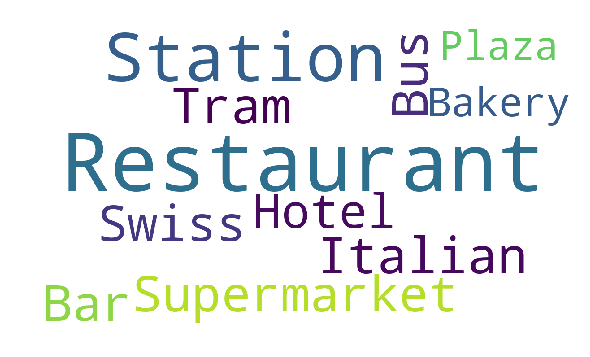

In [94]:
comment_words = ' '
stopwords = set(STOPWORDS)

for i, row in cluster1_2.iterrows():
    comment_words = comment_words + row['1st Most Common Venue'] + ' ' + row['2nd Most Common Venue'] + ' ' + row['3rd Most Common Venue'] + ' ' + row['4th Most Common Venue'] + ' ' + row['5th Most Common Venue'] + ' ' + row['6th Most Common Venue'] + ' ' + row['7th Most Common Venue'] + ' ' + row['8th Most Common Venue'] + ' ' + row['9th Most Common Venue'] + ' ' + row['10th Most Common Venue'] + ' '

wordcloud = WordCloud(width = 1200, height = 720, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

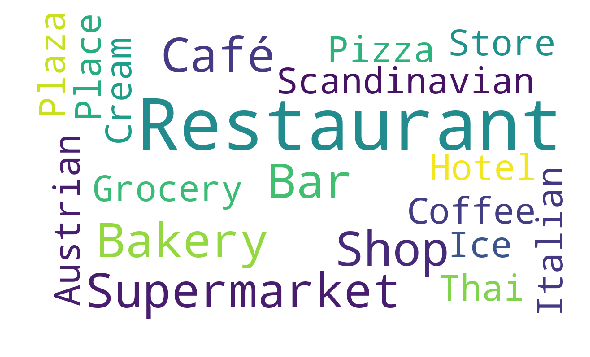

In [95]:
comment_words = ' '
stopwords = set(STOPWORDS)

for i, row in cluster2_2.iterrows():
    comment_words = comment_words + row['1st Most Common Venue'] + ' ' + row['2nd Most Common Venue'] + ' ' + row['3rd Most Common Venue'] + ' ' + row['4th Most Common Venue'] + ' ' + row['5th Most Common Venue'] + ' ' + row['6th Most Common Venue'] + ' ' + row['7th Most Common Venue'] + ' ' + row['8th Most Common Venue'] + ' ' + row['9th Most Common Venue'] + ' ' + row['10th Most Common Venue'] + ' '

wordcloud = WordCloud(width = 1200, height = 720, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

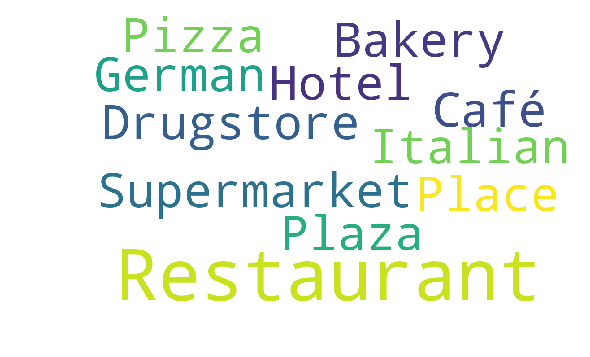

In [96]:
comment_words = ' '
stopwords = set(STOPWORDS)

for i, row in cluster3_2.iterrows():
    comment_words = comment_words + row['1st Most Common Venue'] + ' ' + row['2nd Most Common Venue'] + ' ' + row['3rd Most Common Venue'] + ' ' + row['4th Most Common Venue'] + ' ' + row['5th Most Common Venue'] + ' ' + row['6th Most Common Venue'] + ' ' + row['7th Most Common Venue'] + ' ' + row['8th Most Common Venue'] + ' ' + row['9th Most Common Venue'] + ' ' + row['10th Most Common Venue'] + ' '

wordcloud = WordCloud(width = 1200, height = 720, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

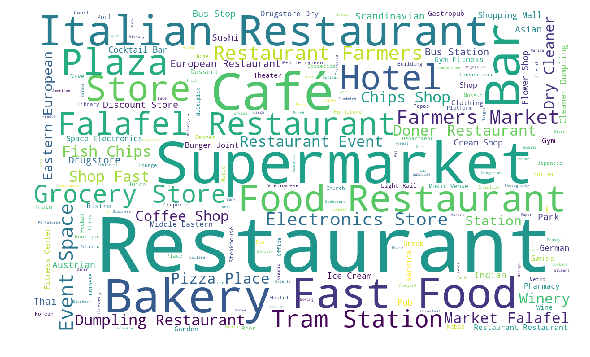

In [85]:
comment_words = ' '
stopwords = set(STOPWORDS)

for i, row in neighborhoods_venues_sorted.iterrows():
    comment_words = comment_words + row['1st Most Common Venue'] + ' ' + row['2nd Most Common Venue'] + ' ' + row['3rd Most Common Venue'] + ' ' + row['4th Most Common Venue'] + ' ' + row['5th Most Common Venue'] + ' ' + row['6th Most Common Venue'] + ' ' + row['7th Most Common Venue'] + ' ' + row['8th Most Common Venue'] + ' ' + row['9th Most Common Venue'] + ' ' + row['10th Most Common Venue'] + ' '

wordcloud = WordCloud(width = 1200, height = 720, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

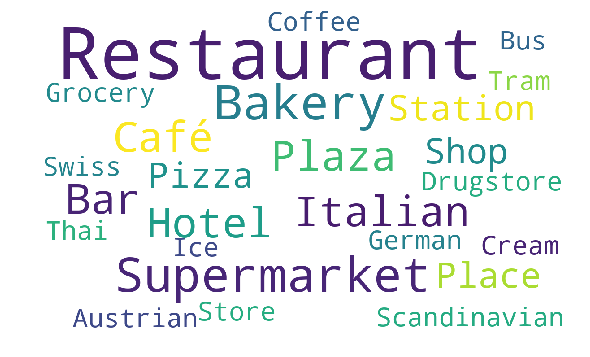

In [86]:
comment_words = ' '
stopwords = set(STOPWORDS)

for i, row in cities_venues_sorted.iterrows():
    comment_words = comment_words + row['1st Most Common Venue'] + ' ' + row['2nd Most Common Venue'] + ' ' + row['3rd Most Common Venue'] + ' ' + row['4th Most Common Venue'] + ' ' + row['5th Most Common Venue'] + ' ' + row['6th Most Common Venue'] + ' ' + row['7th Most Common Venue'] + ' ' + row['8th Most Common Venue'] + ' ' + row['9th Most Common Venue'] + ' ' + row['10th Most Common Venue'] + ' '

wordcloud = WordCloud(width = 1200, height = 720, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## 5. Conclusion

Well, with this research, we can conclude that Vienna and Copenhagen are quite similar in terms of their neighborhoods, with several of their main places in common such as Café, Hotels and Italian Restaurants that are in the top five places of the two cities, we note that despite the dissimilarity of Zurich and Frankfurt with these two cities, it is still at the top inhabited cities of the world in Europe, finally, we can also notice that despite multicultural cities, there are similar neighborhoods between the three, which is of great help for those who want to visit these places and is already accustomed to some of them.

## 6. Discussion


When we compared the neighborhoods, we saw that there are neighborhoods that flee from the pattern of their respective cities, which is very interesting and that Frankfurt has a great similarity between its neighborhoods.
When comparing the cities, there are a large number of restaurants among them, but individually, Vienna and Copenhagen stand out by number of Café and Zurich by the number of Tram Stations and Frankfurt by the number of German restaurants.
We could also observe that the two top cities in the ranking of livable cities, Vienna and Copenhagen are quite similar.
